In [1]:
!pip install pandas
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv(r"C:\Users\ASUS\Desktop\Datasets\Imputed_IPL_Data_with_Team_Names.csv")

In [4]:
dataset_clean = dataset.dropna(subset=['winner'])

In [5]:
# Define the target and feature columns
target_col = 'winner'
feature_cols = [
    'team1', 'team2', 'toss_winner', 'toss_decision', 'venue',
    'team1_runs', 'team1_wkts', 'team1_sr', 'team1_br',
    'team2_runs', 'team2_wkts', 'team2_sr', 'team2_br',
    'team1_win_pct', 'team2_win_pct',
    'toss_win_match_win', 'team1_home'
]

# Prepare features and labels again
X_train = dataset_clean[feature_cols]
y_train = dataset_clean[target_col]

# Show shape and preview
X_train.shape, y_train.shape, X_train.head(), y_train.head()


((1090, 17),
 (1090,),
    team1  team2  toss_winner  toss_decision  venue  team1_runs  team1_wkts  \
 0     16      8           16              1     23  169.286792    6.064151   
 1      6      0            0              0     40  169.286792    6.064151   
 2      3     13           13              0     16  169.286792    6.064151   
 3     10     16           10              0     55  165.000000    7.000000   
 4      8      1            1              0     14  169.286792    6.064151   
 
     team1_sr   team1_br  team2_runs  team2_wkts    team2_sr   team2_br  \
 0  142.37214  17.633793  155.353535    5.782828  139.985326  17.630091   
 1  142.37214  17.633793  155.353535    5.782828  139.985326  17.630091   
 2  142.37214  17.633793  155.353535    5.782828  139.985326  17.630091   
 3  137.50000  19.166667  166.000000    5.000000  140.677966  17.796610   
 4  142.37214  17.633793  155.353535    5.782828  139.985326  17.630091   
 
    team1_win_pct  team2_win_pct  toss_win_match_

In [6]:
target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y_train)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_encoded, test_size=0.2, random_state=42)

In [8]:
!pip install xgboost
from xgboost import XGBClassifier


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Try 3 different parameter combinations
param_sets = [
    {"n_estimators": 50, "max_depth": 4, "learning_rate": 0.1},
    {"n_estimators": 75, "max_depth": 5, "learning_rate": 0.07},
    {"n_estimators": 100, "max_depth": 6, "learning_rate": 0.05}
]

In [10]:
from sklearn.metrics import accuracy_score, classification_report
results = []

for i, params in enumerate(param_sets):
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        learning_rate=params["learning_rate"],
        subsample=0.8,
        colsample_bytree=0.8
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(
        y_val, y_pred, 
        target_names=target_le.classes_, 
        labels=np.unique(y_val), 
        output_dict=True
    )
    results.append({
        "params": params,
        "accuracy": acc,
        "f1_macro": report["macro avg"]["f1-score"]
    })

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:04:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2687: UserWarning: labels size, 17, does not match size of target_names, 18
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and

In [11]:
best_params = {
    "n_estimators": 75,
    "max_depth": 5,
    "learning_rate": 0.07
}

final_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    subsample=0.8,
    colsample_bytree=0.8
)
final_model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:04:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
X_2025_ready = pd.read_csv(r"C:\Users\ASUS\Desktop\Datasets\Final test data.csv")
print(X_2025_ready.head())

   Unnamed: 0  Match Number             team1_name  \
0           0           NaN  Kolkata Knight Riders   
1           1           NaN    Sunrisers Hyderabad   
2           2           NaN    Chennai Super Kings   
3           3           NaN         Delhi Capitals   
4           4           NaN         Gujarat Titans   

                    team2_name  \
0  Royal Challengers Bengaluru   
1             Rajasthan Royals   
2               Mumbai Indians   
3         Lucknow Super Giants   
4                 Punjab Kings   

                                               Venue  team1  team2  \
0                              Eden Gardens, Kolkata      8     17   
1  Rajiv Gandhi International Stadium, Uppal, Hyd...     18     13   
2           MA Chidambaram Stadium, Chepauk, Chennai      0     10   
3  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...      2      9   
4                   Narendra Modi Stadium, Ahmedabad      5     12   

   toss_winner  toss_decision  venue  ...  team1_

In [13]:
X_2025_ready = X_2025_ready[[
    'team1', 'team2', 'toss_winner', 'toss_decision', 'venue',
    'team1_runs', 'team1_wkts', 'team1_sr', 'team1_br',
    'team2_runs', 'team2_wkts', 'team2_sr', 'team2_br',
    'team1_win_pct', 'team2_win_pct',
    'toss_win_match_win', 'team1_home'
]]

# Now it's safe to predict
y_pred = model.predict(X_2025_ready)

In [14]:
print(f"Predictions for 2025 matches: {y_pred}")

Predictions for 2025 matches: [ 7 17  0  2 11 12 17  0  9  2  0  9  8  5  7  8  0 12  7 17  9 11 12 11
  7  8 17 12  2  8 11 12  9 11 11 12 11  9  7  8 17 12  0  7  9  2 12  7
  0 12 17  0  7 11 17  9  7 11  8 17 11  2 12 15  5  9 12  7  0  8]


In [15]:
predicted_teams = target_le.inverse_transform(y_pred)
print(f"Predicted winning teams for 2025 matches: {predicted_teams}")

Predicted winning teams for 2025 matches: ['Kolkata Knight Riders' 'Sunrisers Hyderabad' 'Chennai Super Kings'
 'Delhi Capitals' 'Punjab Kings' 'Rajasthan Royals' 'Sunrisers Hyderabad'
 'Chennai Super Kings' 'Mumbai Indians' 'Delhi Capitals'
 'Chennai Super Kings' 'Mumbai Indians' 'Lucknow Super Giants'
 'Gujarat Titans' 'Kolkata Knight Riders' 'Lucknow Super Giants'
 'Chennai Super Kings' 'Rajasthan Royals' 'Kolkata Knight Riders'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Punjab Kings' 'Rajasthan Royals'
 'Punjab Kings' 'Kolkata Knight Riders' 'Lucknow Super Giants'
 'Sunrisers Hyderabad' 'Rajasthan Royals' 'Delhi Capitals'
 'Lucknow Super Giants' 'Punjab Kings' 'Rajasthan Royals' 'Mumbai Indians'
 'Punjab Kings' 'Punjab Kings' 'Rajasthan Royals' 'Punjab Kings'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Lucknow Super Giants'
 'Sunrisers Hyderabad' 'Rajasthan Royals' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Delhi Capitals'
 'Rajasthan Royals' 'Kolkata Knight Ride

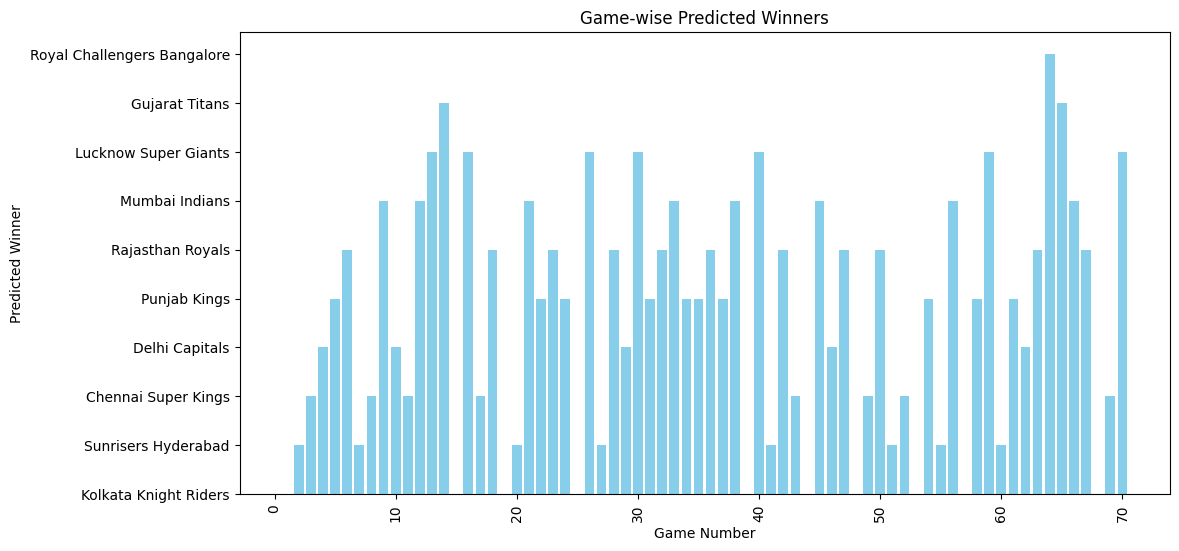

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame for visualization
gamewise_predictions = pd.DataFrame({
    'Game': range(1, len(predicted_teams) + 1),
    'Predicted Winner': predicted_teams
})

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(gamewise_predictions['Game'], gamewise_predictions['Predicted Winner'], color='skyblue')
plt.xlabel('Game Number')
plt.ylabel('Predicted Winner')
plt.title('Game-wise Predicted Winners')
plt.xticks(rotation=90)
plt.show()

In [20]:
from collections import Counter
# predicted_teams = list of your 2025 match predictions
team_win_counts = Counter(predicted_teams)
print(team_win_counts)

Counter({'Rajasthan Royals': 11, 'Kolkata Knight Riders': 10, 'Punjab Kings': 10, 'Sunrisers Hyderabad': 8, 'Chennai Super Kings': 8, 'Mumbai Indians': 8, 'Lucknow Super Giants': 7, 'Delhi Capitals': 5, 'Gujarat Titans': 2, 'Royal Challengers Bangalore': 1})


In [19]:
top_teams = sorted(team_win_counts.items(), key=lambda x: x[1], reverse=True)

# Get top 4 teams only
top_4 = [team for team, _ in top_teams[:4]]
print("Top 4 teams:", top_4)

Top 4 teams: ['Rajasthan Royals', 'Kolkata Knight Riders', 'Punjab Kings', 'Sunrisers Hyderabad']
